<h3><center>Programming for Data Analytics - Project 1</center></h3>
<h1><center>Fisic and sexual violance against women in italy</center></h1>

### 1. Introduction

This project focuses on assessing the probability that a woman in Italy, aged between 15 and 70, will experience physical/sexual violence by her partner/ex-partner in her lifetime. 
To achieve this, various datasets and microdatasets from the [ISTAT [1]](https://esploradati.istat.it/databrowser/#/) have been utilized.

ISTAT, the Italian National Institute of Statistics (Istituto Nazionale di Statistica), operates as the official statistical agency of Italy, functioning under the supervision of the Italian Ministry of Economy and Finance. It is tasked with collecting, producing, and disseminating statistical information across diverse aspects of Italian society and the economy.

The study considers four variables, and a dataset has been constructed to explore, based on each combination of these variables, the probability and likelihood of a woman experiencing physical/sexual violence by her partner/ex-partner in her lifetime.

The four variables under consideration are:

1. Area of residence
2. Level of education
3. Marital status
4. Occupational level

By combining the probabilities associated with each variable (e.g., the probability that a woman with a particular level of education will endure violence), the project aims to calculate, using a binomial distribution, whether the event will occur or not. 



### 2. Import the needed library

As a first stap I would like import the library that will be needed in the project. 
they are:

- **pandas**: This library is widely used for data manipulation and analysis. It provides data structures like DataFrame for efficient data manipulation with integrated indexing. Pandas is particularly useful for handling structured data and working with time-series data numpy [[]](https://pandas.pydata.org/).
- **numpy**: Numpy is a powerful library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these elements. Many other scientific and data analysis libraries in Python, including pandas, are built on top of NumPy [[]](https://numpy.org/).
- **seaborn**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for creating informative and visually appealing statistical graphics, making it easier to explore and understand complex datasets [[]](https://seaborn.pydata.org/).
- **matplotlib**: Matplotlib is a comprehensive 2D plotting library for Python. It provides a wide variety of static, animated, and interactive plots for visualizing data [[]](https://matplotlib.org/). 

In [739]:
#Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the numpy library for numerical operations and array manipulations
import numpy as np
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the matplotlib library for data visualization 
import matplotlib.pyplot as plt

### **3. Region of resident**

The **region of residence** plays a significant role in analyzing the risk of violence against women. It is often observed that the poorest regions are associated with higher instances of sexual and physical violence against women. This correlation can be attributed to a combination of economic and cultural factors. Women residing in economically disadvantaged regions face greater challenges in personal development, have limited access to resources for preventing and escaping violence. In addition, the probability of endure violence may be influenced by a cultural environment that tolerates such phenomena. This interconnectedness creates a complex scenario where the acceptance of violence against women becomes more prevalent [[]](https://www.ladynomics.it/conoscere-la-violenza-economica-2a-puntata-la-poverta/).

Italy can be divided into three main regions: **North, South (including islands), and Central**. Historically, the Northern region has exhibited higher economic development, providing more employment and developmental opportunities for its population. Conversely, the South is acknowledged as the economically poorest area of Italy, characterized by a significantly affected employment rate and a culture that mirrors this economic situation. The Central region falls in between these extremes. Otherwise, the South is know as a place with a strong cultural identity with strong cultural identity. 

In the process of creating the database:
1.  our first step involves determining the **probability of women aged 15 to 70 experiencing violence segmented by region**, considering the distinct characteristics of the North, South, and Central regions.
2. Following this, we will construct an initial dataframe comprising **200 randomly generated entries**, strategically distributed among the three regions: North, South, and Central.


#### **3.1 Regional Disparities: Probability of Violence Against Women Across Italy's Main Regions**

As a preliminary step, we need to calculate the probability that a woman residing in the South, North, or Centre will experience violence from a partner or ex-partner over her lifetime.

To achieve this, ISTAT has published microdatasets that explore the impact of various variables on violence against women. Specifically, there is a dataset available on the website that connects the region of residence with the percentage of women who endure violence [[]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE).

Our next tasks involve importing the dataset, exploring its contents, and performing data cleaning and manipulation to derive the probability of violence associated with each region.

    - Import the dataset

The dataseset has been imported from the ISTAT [[A]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE) as a CSV and saved on the repository. The folder **DataSet** contain all the dataset used on the current project. We will them use the **read_csv()** function to import it as a dataframe unsing pandas [[]](https://www.w3schools.com/python/pandas/pandas_csv.asp). 

In [660]:
# Importing the dataset on violence divided per region
violence_by_region = pd.read_csv('DataSet/Violence divided per region.csv')

    - Ceck missing value 

We can now check for missing values using the isnull() function [[]](https://note.nkmk.me/en/python-pandas-nan-judge-count/). The dataset reveals missing values only in the 'flag' and 'flag codeds' columns. However, upon further inspection of the dataset, it is evident that these columns are not relevant, as they are empty. Therefore, we will be able after to drop those columns 

In [661]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence by region" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = violence_by_region.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence by region" ==
ITTER107                 0
Territory                0
TIPO_DATO_VIOLENZA       0
Data type                0
TIPOAUT                  0
Perpetrator              0
TIPOVIOLENZA             0
Type of violence         0
TIME                     0
Select time              0
Value                    0
Flag Codes            1204
Flags                 1204
dtype: int64


    - Data exploration, manipulation and cleaning 

*Sampling the dataset*

To begin our dataset observation and identify columns and rows for removal, we can utilize the **sample()** function [[]](https://www.geeksforgeeks.org/python-pandas-dataframe-sample/). This function will display a random selection of rows from the specified dataset, aiding us in assessing the data and making informed decisions on what to remove."

In [662]:
# Printing a header to indicate that the following lines are a sample from the "violence by region" dataset
print(f'== Sample lines from "violence by region" ==')
# Using the sample() function to display a random selection of 5 rows from the dataset
sample_data = violence_by_region.sample(5)
# Printing the sampled data
print(sample_data)

== Sample lines from "violence by region" ==
    ITTER107  Territory TIPO_DATO_VIOLENZA  \
76      ITC1   Piemonte      W16_70_CFP_LT   
158     ITC3    Liguria      W16_70_PNP_LT   
717     ITE3     Marche       W16_70_CP_Y5   
602     ITE1    Toscana      W16_70_CFP_Y5   
247     ITC4  Lombardia       W16_70_CP_LT   

                                             Data type       TIPOAUT  \
76   women aged 16-70 years who have suffered viole...  CURR_OR_FORM   
158  women aged 16-70 years who have suffered viole...     ANY_P_NOP   
717  women aged 16-70 years who have suffered viole...        CURR_P   
602  women aged 16-70 years who have suffered viole...  CURR_OR_FORM   
247  women aged 16-70 years who have suffered viole...        CURR_P   

                           Perpetrator TIPOVIOLENZA         Type of violence  \
76   current partner or former partner        PHSEX       physical or sexual   
158  any man (partner and non-partner)      SEXVIOL          sexual violence   
717  

*Dropping useless columns and renaming for better clarity*

After observing the dataset, it appears that most columns contain duplicate or irrelevant data. Consequently, our initial step involves dropping empty or redundant columns using the **drop()** function [[]](https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/). This will be done after defining a list of columns to be dropped. 

We can them rename for clairty some of the columns. At the porpuse we will use the **rename()** function [[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html), [[]](https://www.kdnuggets.com/2022/11/4-ways-rename-pandas-columns.html). 

In [663]:
# List of columns to be removed from the 'violence_by_region' DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_VIOLENZA', 'TIPOAUT', 'TIPOVIOLENZA',
       'Select time', 'Flag Codes', 'Flags']
# Remove the specified columns from the 'violence_by_region' DataFrame
violence_by_region = violence_by_region.drop(columns=columns_to_be_removed)
# Renaming columns in a Pandas DataFrame for clarity
violence_by_region.rename(columns={"TIME": "Year", 
                                   'Value':'%_Violence_Territory',
                                   'Territory': 'AreaOfResidence'}, inplace=True)

The **%_Violence_Territory** column contains the percentage of women with those characteristics who endured violence. For better clarity, we can represent this percentage as a decimal number between 0 and 1. 

In [664]:
# Modify the format of the '%_Violence_Territory' column to be in the range [0, 1]
violence_by_region['%_Violence_Territory'] = violence_by_region['%_Violence_Territory'] / 100

*Remove the duplicate or not relevant rows of the dataset*

After observation we can see that some columns contain duplicate or not relevant data. 
Focusing on the **perpetrator** column we can explore the unique() [[]](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) value to check for relevant data.

In [665]:
# Displaying unique values in the 'Perpetrator' column of the 'violence_by_region' DataFrame
violence_by_region['Perpetrator'].unique()

array(['any man (partner and non-partner)', 'man non-partner',
       'current partner or former partner', 'current partner',
       'former partner'], dtype=object)

From above we can see that the only relevant value for our research is 'current partner or former partner'. 
In the same way I have checked the other column and determine what are the relevant data that need to be kept.

Here the list of value to retain per columns name:

| Column Name        | Value(s)                                                                                 |
|--------------------|-------------------------------------------------------------------------------------------|
| Type of Violence   | physical or sexual                                                                   |
| Perpetrator        | current partner or former partner                                                     |
| Data type          | women aged 16-70 years who have suffered violence lifetime (% of ever-partnered women 16-70 years)|
| AreaOfResidence    | Keep everything is not 'Italy'|

For the porpuse a **filter_and_replace()** function will be defined. The function filters, using the **.loc** method [[]](https://blog.hubspot.com/website/filter-rows-pandas), replaces values, using the **replace()** function [[]](https://www.youtube.com/watch?app=desktop&v=8Y1UkY0oAXM) in specific columns and the modified dataframe is returned. 
Finally the code keep for the column 'AreaOfResidence' the value that are not 'Italy'.

In [666]:
# Function to filter and replace values in the 'violence_by_region' DataFrame
def filter_and_replace(dataframe):
    # Filter for rows where 'Type of violence' is 'physical or sexual'
    dataframe = dataframe.loc[dataframe['Type of violence'] == 'physical or sexual']
    # Replace 'physical or sexual' with 'Physical/Sexual' in the 'Type of violence' column
    dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')
    # Filter for rows where 'Perpetrator' is 'current partner or former partner'
    dataframe = dataframe.loc[dataframe['Perpetrator'] == 'current partner or former partner']
    # Replace 'current partner or former partner' with 'Partner/Ex Partner' in the 'Perpetrator' column
    dataframe['Perpetrator'] = dataframe['Perpetrator'].replace('current partner or former partner', 'Partner/Ex Partner')
    # Filter for rows where 'Data type' matches a specific condition
    dataframe = dataframe.loc[dataframe['Data type'] == 'women aged 16-70 years who have suffered violence lifetime (% of ever-partnered women 16-70 years)']
    # Replace 'women aged 16-70 years who have suffered violence lifetime (% of ever-partnered women 16-70 years)' with 'Victims 16-70 - lifetime' in the 'Data type' column
    dataframe['Data type'] = dataframe['Data type'].replace('women aged 16-70 years who have suffered violence lifetime (% of ever-partnered women 16-70 years)', 'Victims 16-70 - lifetime')
    return dataframe

# Applying the filter_and_replace function to the 'violence_by_region' DataFrame
violence_by_region = filter_and_replace(violence_by_region)

# Filtering out rows where 'Territory' is 'Italy'
violence_by_region = violence_by_region.loc[violence_by_region['AreaOfResidence'] != 'Italy']

C:\Users\anton\AppData\Local\Temp\ipykernel_42288\2240718972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')


*Classifying observations in the 'AreaofResidence' column based on three main areas: North, South, and Centre*

Next, we need to determine the area of residence for each observation. The dataset categorizes observations into regions and two autonomous provinces. In Italy, regions and autonomous provinces are administrative subdivisions with varying degrees of self-governance. Italy comprises 20 regions, with 8 in the North, 4 in the Centre, and 8 in the South. Additionally, the two autonomous provinces to which the observations are assigned belong to the North. [[]](https://www.tuttitalia.it/statistiche/nord-centro-mezzogiorno-italia/).

In [751]:
# Define a dictionary for mapping regions to broader areas
replacements_regions = {
    'Liguria': 'North',
    'Lombardia': 'North',
    'Piemonte': 'North',
    "Valle d'Aosta / Vallée d'Aoste": 'North',
    'Emilia-Romagna': 'North',
    'Friuli-Venezia Giulia': 'North',
    'Trentino Alto Adige / Südtirol': 'North',
    'Veneto': 'North',
    'Provincia Autonoma Bolzano / Bozen': 'North',
    'Provincia Autonoma Trento': 'North',
    'Lazio': 'Centre',
    'Marche': 'Centre',
    'Toscana': 'Centre',
    'Umbria': 'Centre',
    'Abruzzo': 'South',
    'Basilicata': 'South',
    'Calabria': 'South',
    'Campania': 'South',
    'Molise': 'South',
    'Puglia': 'South',
    'Sardegna': 'South',
    'Sicilia': 'South',
}

# Replace values in the 'AreaOfResidence' column based on the defined mapping
violence_by_region['AreaOfResidence'] = violence_by_region['AreaOfResidence'].replace(replacements_regions)

    - Determining the Final Probability Table

Finally, we need to extract the ultimate table that displays the probability of a woman residing in each of the three areas enduring physical/sexual violence from a partner/ex-partner during her lifetime. This will be accomplished by utilizing the groupby() [[]](https://realpython.com/pandas-groupby/) [[]](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/) function and averaging the values.


In [752]:
# Grouping the 'violence_by_region' DataFrame by 'AreaOfResidence' and calculating the mean of '%_Violence_Territory' for each group
violence_by_region_probability = violence_by_region.groupby('AreaOfResidence')['%_Violence_Territory'].mean().reset_index()

# Displaying the resulting DataFrame showing the probability of violence for each area of residence
print(violence_by_region_probability)

  AreaOfResidence  %_Violence_Territory
0          Centre              0.154750
1           North              0.130700
2           South              0.122625


To better understand the data we can now plot a bar using the **barplot()** function [[]](https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/).

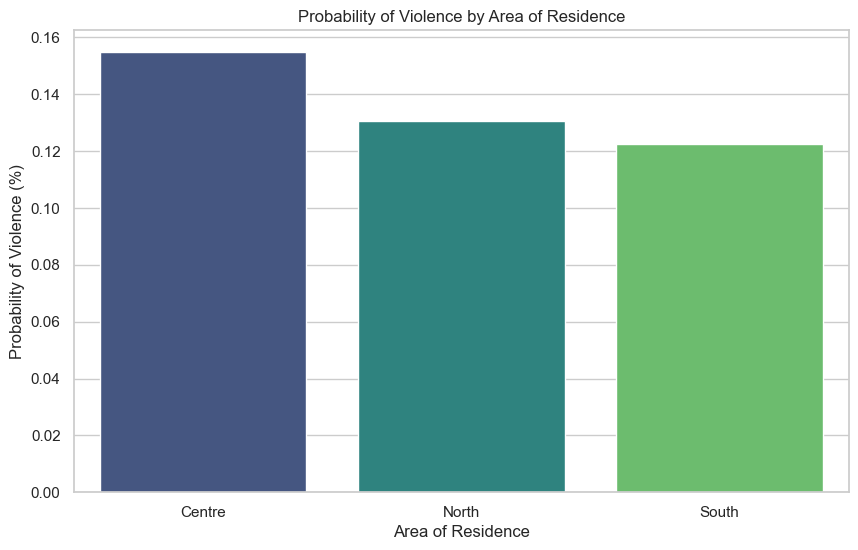

In [753]:

# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Creating a bar plot using seaborn
sns.barplot(x='AreaOfResidence', y='%_Violence_Territory', hue='AreaOfResidence', data=violence_by_region_probability, palette="viridis")

# Adding labels and title to the plot
plt.xlabel('Area of Residence')  # X-axis label
plt.ylabel('Probability of Violence (%)')  # Y-axis label
plt.title('Probability of Violence by Area of Residence')  # Title of the plot

# Displaying the plot
plt.show()

As we can see, the area with the highest probability of experiencing violence is the Centre, followed by the North, and finally, the South. As explained before, this could be the result of multifaceted variables such as economic and cultural factors. 

#### **3.2 Generating a DataFrame with 200 Entries for the Variable "AreaOfResidence"**

We will create the **violence_against_women** DataFrame, comprising 200 observations of women characterized by a combination of four variables: Area of Residence, Level of Education, Occupational Status, and Marital Status. Finally it will indicate whether a woman with the specified set of characteristics will experience physical and sexual violence from a partner or ex-partner in her lifetime.

As a first step, we can generate 200 observations that display the variable 'AreaOfResidence.' The entries will be divided among three areas:

- North
- South
- Centre

To generate the entries, we can use a **Random Choice function from NumPy** [[]](https://www.geeksforgeeks.org/random-choices-method-in-python/). The random choice function allows us to randomly assign each observation to one of the specified areas based on predetermined probabilities or weights.

To ensure the realism of our dataset, we will utilize the distribution of the Italian population from the 2020 census as predetermined probabilities or weights [[]](https://www.istat.it/it/files/2021/12/CENSIMENTO-E-DINAMICA-DEMOGRAFICA-2020.pdf). 

In [758]:

# Define the probabilities for each area of residence
prob_population = [0.464, 0.198, 0.338]
# List of areas
area_list = ['North', 'South', 'Centre']
# Use the Random Choice function to generate 'AreaOfResidence' entries in the DataFrame
data = np.random.choice(area_list, p=prob_population, size=200)
# Create the 'violence_against_women' DataFrame with the generated 'AreaOfResidence' entries
violence_against_women = pd.DataFrame(data, columns=['AreaOfResidence'])

# Display the first few rows of the DataFrame
violence_against_women.head()


,AreaOfResidence
0,North
1,Centre
2,South
3,Centre
4,North


### **Education Level**

#### **Probability of violence on womend devided per education level**

In [672]:
violence_per_educational_level = pd.read_csv('DataSet/violence_per_educational_level.csv')
violence_per_educational_level['Territory'].unique()

array(['Italy'], dtype=object)

In [673]:
violence_per_educational_level

,ITTER107,Territory,TIPO_DATO_VIOLENZA,Data type,TIPOAUT,Perpetrator,TIPOVIOLENZA,Type of violence,TITOLO_STUDIO,Educational level,TIME,Select time,Value,Flag Codes,Flags
0,IT,Italy,W16_70_PNP_LT,women aged 16-70 years who have suffered viole...,ANY_P_NOP,any man (partner and non-partner),PHSEX,physical or sexual,ALL,total,2014,2014,31.5,NaN,NaN
1,IT,Italy,W16_70_PNP_LT,women aged 16-70 years who have suffered viole...,ANY_P_NOP,any man (partner and non-partner),PHY,physical violence,ALL,total,2014,2014,20.2,NaN,NaN
2,IT,Italy,W16_70_PNP_LT,women aged 16-70 years who have suffered viole...,ANY_P_NOP,any man (partner and non-partner),SEXVIOL,sexual violence,ALL,total,2014,2014,21.0,NaN,NaN
3,IT,Italy,W16_70_PNP_LT,women aged 16-70 years who have suffered viole...,ANY_P_NOP,any man (partner and non-partner),RAPE_OR_ATT,rape or attempted rape,ALL,total,2014,2014,5.4,NaN,NaN
4,IT,Italy,W16_70_PNP_LT,women aged 16-70 years who have suffered viole...,NOP,man non-partner,PHSEX,physical or sexual,ALL,total,2014,2014,24.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,IT,Italy,W16_70_FP_M12,women aged 16-70 years who have suffered viole...,EX_P,former partner,SEXVIOL,sexual violence,CLF_ML,"university diploma, bachelor’s degree, master’...",2014,2014,0.3,NaN,NaN
296,IT,Italy,W16_70_FP_M12,women aged 16-70 years who have suffered viole...,EX_P,former partner,RAPE_OR_ATT,rape or attempted rape,USE_IF,diploma of upper secondary education and Certi...,2014,2014,0.1,NaN,NaN
297,IT,Italy,W16_70_FP_M12,women aged 16-70 years who have suffered viole...,EX_P,former partner,RAPE_OR_ATT,rape or attempted rape,NP,"no educational degree, final assessment (Prima...",2014,2014,0.0,NaN,NaN
298,IT,Italy,W16_70_FP_M12,women aged 16-70 years who have suffered viole...,EX_P,former partner,RAPE_OR_ATT,rape or attempted rape,LSE,diploma of lower secondary education,2014,2014,0.1,NaN,NaN


In [674]:
columns_to_be_removed = ['ITTER107', 'Territory', 'TIPO_DATO_VIOLENZA', 'TIPOAUT', 'TIPOVIOLENZA', 'TITOLO_STUDIO', 'Select time', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_per_educational_level = violence_per_educational_level.drop(columns=columns_to_be_removed)

#Rename columns TIME and Value for more clarity 
violence_per_educational_level = violence_per_educational_level.rename(columns={'TIME':'Year','Value':'%_Violence_Education', 'Educational level':'Education level' })

In [675]:
print( f'== Missing values for violence_per_educational_level ==')
violence_per_educational_level.isnull().sum()

== Missing values for violence_per_educational_level ==


Data type               0
Perpetrator             0
Type of violence        0
Education level         0
Year                    0
%_Violence_Education    0
dtype: int64

In [676]:
# Filtering the DataFrame to select specific rows based on conditions

# call the function to filter and replace column 'Perpetrator' and 'DataType' previously defined
violence_per_educational_level = filter_and_replace(violence_per_educational_level)
# remove line total from educational level
violence_per_educational_level = violence_per_educational_level.loc[violence_per_educational_level['Education level'] != 'total']

violence_per_educational_level

C:\Users\anton\AppData\Local\Temp\ipykernel_42288\2240718972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')


,Data type,Perpetrator,Type of violence,Education level,Year,%_Violence_Education
156,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,diploma of upper secondary education and Certi...,2014,15.2
157,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,"no educational degree, final assessment (Prima...",2014,7.8
158,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,diploma of lower secondary education,2014,12.5
159,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,"university diploma, bachelor’s degree, master’...",2014,16.0


In [677]:
 #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.all.html  
# https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
# substitute the value that contain the word "scuola" in the education level column with 'Primary education'A
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('Primary school'), 'Education level'] = 'Primary Education'

# substitute the value that contain the word "laurea" in the education level column with 'higher education'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('university'), 'Education level'] = 'Higher Education'

# substitute the value that contain the word "diploma" in the education level column with 'high school'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('diploma'), 'Education level'] = 'High School'
violence_per_educational_level


,Data type,Perpetrator,Type of violence,Education level,Year,%_Violence_Education
156,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,High School,2014,15.2
157,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Primary Education,2014,7.8
158,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,High School,2014,12.5
159,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Higher Education,2014,16.0


In [678]:
violence_per_educational_level['%_Violence_Education'] = violence_per_educational_level['%_Violence_Education']/100

In [679]:
violence_educational_level_probability = violence_per_educational_level.groupby('Education level')['%_Violence_Education'].mean().reset_index()
violence_educational_level_probability

,Education level,%_Violence_Education
0,High School,0.1385
1,Higher Education,0.1600
2,Primary Education,0.0780


#####  **Calculate the education level devided per regionr of women with age 15+ years**

The purpose of this first part is to determine the percentage of women aged 15 and above with various levels of education devided per area of residence: the North, Central, and Southern regions.

The data used for this estimation has been downloaded from the ISTAT website, which is the Italian Institute of Statistics, that leave avaiable to the public several datasets [[]](http://dati.istat.it/?lang=en). The selected dataset, titled "Population 15 years and over by the highest level of education - previous regulation (until 2020)," contains information on different levels of education for residents in Italy, reported in thousands, and provides insights into various demographic characteristics." 


    - Import the dataset

First we need to import the needed library and the dataset with the numpy read_csv function [[]](https://www.w3schools.com/python/pandas/pandas_csv.asp).


In [680]:
# read the dataset 
# https://www.w3schools.com/python/pandas/pandas_csv.asp
Education_level_italy = pd.read_csv('DataSet/Instruction_level_italy.csv')

    - Data Cleaning

It is now important clean and elaborate the dataset to being.

First I will check the dataset with the sample() function to investigate what columns we can drop.

In [681]:
# print first 5 rows  
Education_level_italy.sample(10)

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TITOLO_STUDIO,Titolo di studio,TIME,Seleziona periodo,Value,Flag Codes,Flags
4170,ITC,Nord-ovest,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y35-39,35-39 anni,99,totale,2019,2019,482.199,NaN,NaN
5809,ITC,Nord-ovest,POP_15,popolazione 15 anni e oltre (migliaia),2,femmine,Y_GE65,65 anni e più,3,"licenza di scuola elementare, nessun titolo di...",2020,2020,1054.431,NaN,NaN
3023,ITCD,Nord,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y25-34,25-34 anni,99,totale,2019-Q1,T1-2019,1430.008,NaN,NaN
733,ITE,Centro,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y_GE15,15 anni e più,4,licenza di scuola media,2019-Q4,T4-2019,1627.873,NaN,NaN
8508,ITFG,Mezzogiorno,POP_15,popolazione 15 anni e oltre (migliaia),2,femmine,Y35-64,35-64 anni,3,"licenza di scuola elementare, nessun titolo di...",2019-Q3,T3-2019,575.089,NaN,NaN
4696,ITE,Centro,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y45-49,45-49 anni,11,laurea e post-laurea,2019,2019,219.779,NaN,NaN
5617,ITCD,Nord,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y_GE65,65 anni e più,99,totale,2019-Q4,T4-2019,2812.488,NaN,NaN
8482,ITFG,Mezzogiorno,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y35-64,35-64 anni,6,diploma 4-5 anni (maturità),2020-Q3,T3-2020,1375.091,NaN,NaN
7882,ITCD,Nord,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y35-64,35-64 anni,6,diploma 4-5 anni (maturità),2020-Q3,T3-2020,4016.123,NaN,NaN
4884,ITE,Centro,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y50-54,50-54 anni,5,diploma 2-3 anni (qualifica professionale),2019,2019,27.378,NaN,NaN


Upon examining the dataset, I have identified several columns that can be removed because they are not relevant for the analysis or because they contain redundant information.

These columns include: ['ITTER107', 'TIPO_DATO_FOL', 'SEXISTAT1', 'Tipo dato', 'ETA1', 'Classe di età', 'TITOLO_STUDIO', 'TIME', 'Flag Codes', 'Flags'].

I will use the drop() function with a variable to specify which columns to remove and update the DataFrame accordingly. We can them check the first 5 columns of the dataset with the head() function to see if the removal was successful.

In [682]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_FOL', 'SEXISTAT1', 'Tipo dato', 'ETA1', 'Classe di età', 'TITOLO_STUDIO', 'TIME', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
Education_level_italy = Education_level_italy.drop(columns=columns_to_be_removed)

# Display the first few rows of the modified DataFrame
Education_level_italy.head()

,Territorio,Sesso,Titolo di studio,Seleziona periodo,Value
0,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",2019,3165.895
1,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",T1-2019,3211.849
2,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",T2-2019,3179.996
3,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",T4-2019,3113.926
4,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",T3-2019,3157.808


Replace the colum name with a more understandacle meaning for english speaker using The rename() function [[]](https://www.kdnuggets.com/2022/11/4-ways-rename-pandas-columns.html).

In [683]:
# Renaming columns in a Pandas DataFrame
Education_level_italy.rename(
    columns={"Territorio": "Territory", "Sesso": "Sex", "Titolo di studio": "Education level","Seleziona periodo": "Year of observation" },
    inplace=True
)
# check the columns name of the dataset 
Education_level_italy.columns

Index(['Territory', 'Sex', 'Education level', 'Year of observation', 'Value'], dtype='object')

About the colum sex I will need to keep only female row. We can check the unique value with the function Unique().

In [684]:
# check the unique value in the column sex
Education_level_italy['Sex'].unique()

array(['maschi', 'femmine', 'totale'], dtype=object)

We will use the .loc [[]](https://deallen7.medium.com/using-pandas-loc-and-isin-to-filter-for-a-list-of-values-in-python-a1c862054058) function to select only the row with the specified value "femmine," and then we will update the dataset accordingly. Finally, we will replace "femmine" with "female [[]](https://datatofish.com/replace-values-pandas-dataframe/).

In [685]:
# keep only the rows with value "femmmine" in the sex colum
Education_level_italy = Education_level_italy.loc[Education_level_italy['Sex'] == 'femmine']
# replace "femmine" with "female"
Education_level_italy['Sex']=Education_level_italy['Sex'].replace("femmine", "Female")
# check unique value 
Education_level_italy['Sex'].unique()

array(['Female'], dtype=object)

The 'Region' column, after conducting a unique() analysis, revealed redundant values. 
'Italy,' 'Nord est,' and 'Nord Ovest' are already encompassed within 'Nord,' 'Centro' (Centre), and 'Mezzogiorno' (South). Consequently, I will remove the unnecessary values and rename the remaining rows for better clarity [[]](https://datatofish.com/replace-values-pandas-dataframe/).

In [686]:
# List of values to be selected from the 'Region' column
filter_list = ['Nord-est', 'Nord-ovest', 'Italia']

# Filter the DataFrame 'Instruction_level_italy' to exclude rows where 'Territorio' is in the 'filter_list'
Education_level_italy = Education_level_italy.loc[~Education_level_italy['Territory'].isin(filter_list)]

# replace mezzogiorno and centro

Education_level_italy['Territory'] = Education_level_italy['Territory'].replace({"Mezzogiorno": "Sud", "Centro": "Centre"})
# check the removal and replacement with the group by function 
filtered_grouped_data = Education_level_italy.groupby('Territory')['Value'].sum().reset_index()
print(filtered_grouped_data)

  Territory       Value
0    Centre  308497.782
1      Nord  701864.224
2       Sud  527195.457


Regarding the column "Year", after visualising the content, I decide to keep only the more recent observation that refer to the whole 2020.

In [687]:
# keep only the rows with value "2020" in the 'Year of observation' column
Education_level_italy = Education_level_italy.loc[Education_level_italy['Year of observation'] == '2020']

# display the unique value using the group by column 
Education_level_italy.groupby('Year of observation')['Value'].sum().reset_index()

,Year of observation,Value
0,2020,184291.114


The columns represent the five different levels of education that can be attained in Italy. However, for this analysis, I intend to categorize them into the following three main levels:

- Primary education: Individuals who have completed only primary school education (typically up to 13 years of age).
- High school education: Individuals who have successfully completed high school (typically up to 19 years of age).
- Higher education: This category encompasses all forms of higher education, including degrees, bachelor's degrees, master's degrees, PhDs, and more.

The replace will be done with the pandas metho str.contain [[]](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html), [[]](https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas).

In [688]:

# https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
# substitute the value that contain the word "scuola" in the education level column with 'Primary education'A
Education_level_italy.loc[Education_level_italy['Education level'].str.contains('scuola'), 'Education level'] = 'Primary Education'

# substitute the value that contain the word "diploma" in the education level column with 'high school'
Education_level_italy.loc[Education_level_italy['Education level'].str.contains('diploma'), 'Education level'] = 'High School'

# substitute the value that contain the word "laurea" in the education level column with 'higher education'
Education_level_italy.loc[Education_level_italy['Education level'].str.contains('laurea'), 'Education level'] = 'Higher Education'

Then we can remove the 'total' column, as it is redundant, and group the dataset by education level. 
The removal will be done using the .loc function  [[]](https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/) which will find all the values that don't match the given date, and the dataset will be updated accordingly.

In [689]:
# Filter the DataFrame 'Instruction_level_italy' to exclude rows where 'Territorio' is in the 'filter_list'
# https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
Education_level_italy = Education_level_italy.loc[Education_level_italy['Education level'] != 'totale']

# Group by the dataset based on unique value of the column 'Education level'
Education_level_italy = Education_level_italy.groupby(['Territory', 'Sex', 'Education level', 'Year of observation'])['Value'].sum().reset_index()

Now we can split the datases on three different dataset, one for each region. 

In [690]:
Education_level_italy

,Territory,Sex,Education level,Year of observation,Value
0,Centre,Female,High School,2020,7281.301
1,Centre,Female,Higher Education,2020,4066.783
2,Centre,Female,Primary Education,2020,7111.766
3,Nord,Female,High School,2020,16744.704
4,Nord,Female,Higher Education,2020,8039.184
5,Nord,Female,Primary Education,2020,17261.569
6,Sud,Female,High School,2020,10937.283
7,Sud,Female,Higher Education,2020,4730.042
8,Sud,Female,Primary Education,2020,15972.930


In [691]:
Education_level_italy.columns

Index(['Territory', 'Sex', 'Education level', 'Year of observation', 'Value'], dtype='object')

Now, we can calculate the probability of each level of education divided by region. We use the *groupby* operation to group the data by the 'Region' column and calculate the sum of the values for each group. Afterward, we utilize the *map* [[]](https://www.geeksforgeeks.org/python-map-function/) function to create a new column, 'Probability%', based on the total value of the corresponding region.



In [692]:
# Group the data by 'Region' and calculate the sum of 'Value' for each group
region_groups = Education_level_italy.groupby('Territory')['Value'].sum()

# Calculate the probability percentage for each region
# https://sparkbyexamples.com/pandas/pandas-map-function-explained/
# https://practicaldatascience.co.uk/data-science/how-to-use-the-pandas-map-function
Education_level_italy['%_Education_level'] = Education_level_italy['Value'] / Education_level_italy['Territory'].map(region_groups)
Education_level_italy

,Territory,Sex,Education level,Year of observation,Value,%_Education_level
0,Centre,Female,High School,2020,7281.301,0.394440
1,Centre,Female,Higher Education,2020,4066.783,0.220304
2,Centre,Female,Primary Education,2020,7111.766,0.385256
3,Nord,Female,High School,2020,16744.704,0.398252
4,Nord,Female,Higher Education,2020,8039.184,0.191202
5,Nord,Female,Primary Education,2020,17261.569,0.410545
6,Sud,Female,High School,2020,10937.283,0.345676
7,Sud,Female,Higher Education,2020,4730.042,0.149494
8,Sud,Female,Primary Education,2020,15972.930,0.504829


In [693]:
# Group Education_level_italy by 'Region'
grouped_education = Education_level_italy.groupby('Territory')['%_Education_level']

Education_List = ['High School', 'Primary Education', 'Higher Education']

# Define a function to sample education levels based on probabilities for each region
def Education_level(row):
    region = row['Territory']
    probabilities = grouped_education.get_group(region).values
    education = np.random.choice(Education_List, p=probabilities)
    return education

# Apply the function to create the 'Education' column
violence_against_women["Education level"] = violence_against_women.apply(Education_level, axis=1)

violence_against_women 

,Territory,Education level
0,Sud,High School
1,Centre,Higher Education
2,Centre,Primary Education
3,Centre,High School
4,Centre,Primary Education
...,...,...
195,Sud,High School
196,Nord,Primary Education
197,Centre,High School
198,Centre,Higher Education


### Occupancy level

#### **Percentage of violence against women by occupancy level**

In [694]:
violence_per_labour_status = pd.read_csv('DataSet/Violence per labour status.csv')
violence_per_labour_status.columns

Index(['ITTER107', 'Territory', 'TIPO_DATO_VIOLENZA', 'Data type', 'TIPOAUT',
       'Perpetrator', 'TIPOVIOLENZA', 'Type of violence', 'CITTADINANZA',
       'Citizenship', 'CONDIZIONE_DICH4', 'Labour and professional status',
       'TIME', 'Select time', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [695]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_VIOLENZA', 'TIPOAUT',
       'TIPOVIOLENZA', 'CITTADINANZA', 'Citizenship', 'CONDIZIONE_DICH4',
       'TIME', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_per_labour_status = violence_per_labour_status.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
violence_per_labour_status.rename(
    columns={'TIME': "Year", 
             'Labour and professional status': 'Professional Status',
             'Value':'%_violence_labour'
        },  inplace=True)

violence_per_labour_status['%_violence_labour'] = violence_per_labour_status['%_violence_labour']/100

In [696]:
# Filtering the DataFrame to select specific rows based on conditions

# call the function to filter and replace column 'Perpetrator' and 'DataType' previously defined
violence_per_labour_status = filter_and_replace(violence_per_labour_status)

# remove line all items from educational level
violence_per_labour_status = violence_per_labour_status.loc[violence_per_labour_status['Professional Status'] != 'all items']



C:\Users\anton\AppData\Local\Temp\ipykernel_42288\2240718972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')


In [697]:
# replace labour values on occupied and unoccupied 
replacements_labour_status= {
    'seeking for job': 'Unoccupied',
    'executive, employer, professional': 'Occupied',
    'blu collar, apprentice':'Occupied',
    'self-employed, family worker, co.co.co.':'Occupied',
    'housewife':'Unoccupied',
    'student':'Unoccupied',
    'other condition (different from housewife,student,seeking for job,retired)':'AssertionErrorUnoccupied',
    'retired':'Occupied',
    'middle management, white collar':'Occupied'
}


violence_per_labour_status['Professional Status'] = violence_per_labour_status['Professional Status'].replace(replacements_labour_status)
violence_per_labour_status

,Territory,Data type,Perpetrator,Type of violence,Professional Status,Select time,%_violence_labour
1228,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.075
1288,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Unoccupied,2014,0.163
1348,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.181
1408,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.165
1468,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.182
1528,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Occupied,2014,0.132
1588,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Unoccupied,2014,0.090
1648,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,Unoccupied,2014,0.120
1708,Italy,Victims 16-70 - lifetime,Partner/Ex Partner,Physical/Sexual,AssertionErrorUnoccupied,2014,0.151


In [698]:
violence_per_labour_statu_probability = violence_per_labour_status.groupby('Professional Status')['%_violence_labour'].mean().reset_index()

violence_per_labour_statu_probability

,Professional Status,%_violence_labour
0,AssertionErrorUnoccupied,0.151000
1,Occupied,0.147000
2,Unoccupied,0.124333


#### **calculate the percentage of occupancy in italy per region/level of education**

In [699]:
# import the dataset - Occupancy data set 

occupancy_rate = pd.read_csv('DataSet/Occupancy data.csv')

In [700]:
occupancy_rate.columns

Index(['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE', 'Indicator',
       'SEX', 'Sex (DESC)', 'AGE', 'Age (DESC)', 'EDU_LEV_HIGHEST',
       'Highest level of education attained', 'Time (TIME_PERIOD)',
       'Observation', 'OBS_STATUS', 'Observation status'],
      dtype='object')

In [701]:
occupancy_rate

,FREQ,Frequency,REF_AREA,Territory,DATA_TYPE,Indicator,SEX,Sex (DESC),AGE,Age (DESC),EDU_LEV_HIGHEST,Highest level of education attained,Time (TIME_PERIOD),Observation,OBS_STATUS,Observation status
0,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,13,'No educational degree primary and lower seco...,2021,9.831454,NaN,NaN
1,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,13,'No educational degree primary and lower seco...,2022,10.582486,NaN,NaN
2,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,7,Upper and post secondary,2021,34.882412,NaN,NaN
3,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,7,Upper and post secondary,2022,37.776690,NaN,NaN
4,A,Annual,IT,Italy,EMP_R,Employment rate,1,Males,Y15-24,15-24 years,11,'Tertiary (university doctoral and specializa...,2021,20.871990,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2022-Q2,36.562612,NaN,NaN
9266,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2022-Q3,36.103998,NaN,NaN
9267,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2022-Q4,36.354608,NaN,NaN
9268,Q,Quarterly,ITFG,Mezzogiorno,EMP_R,Employment rate,9,Total,Y15-89,15-89 years,99,Total,2023-Q1,36.269613,NaN,NaN


In [702]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['FREQ', 'Frequency', 'REF_AREA', 'DATA_TYPE', 'Indicator',
       'SEX', 'AGE', 'EDU_LEV_HIGHEST', 'OBS_STATUS', 'Observation status']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
occupancy_rate = occupancy_rate.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
occupancy_rate.rename(
    columns={"Time (TIME_PERIOD)": "Year",
            "Age (DESC)": 'Age',
            "Highest level of education attained":"Education level",
            'Sex (DESC)': 'Sex',
            'Observation' : '%_occupation'},
    inplace=True
)

occupancy_rate

,Territory,Sex,Age,Education level,Year,%_occupation
0,Italy,Males,15-24 years,'No educational degree primary and lower seco...,2021,9.831454
1,Italy,Males,15-24 years,'No educational degree primary and lower seco...,2022,10.582486
2,Italy,Males,15-24 years,Upper and post secondary,2021,34.882412
3,Italy,Males,15-24 years,Upper and post secondary,2022,37.776690
4,Italy,Males,15-24 years,'Tertiary (university doctoral and specializa...,2021,20.871990
...,...,...,...,...,...,...
9265,Mezzogiorno,Total,15-89 years,Total,2022-Q2,36.562612
9266,Mezzogiorno,Total,15-89 years,Total,2022-Q3,36.103998
9267,Mezzogiorno,Total,15-89 years,Total,2022-Q4,36.354608
9268,Mezzogiorno,Total,15-89 years,Total,2023-Q1,36.269613


In [703]:
# List of values to be selected from the 'Territity' column
filter_list = ['Nord-est', 'Nord-ovest', 'Italy']

# Filter the DataFrame 'Instruction_level_italy' to exclude rows where 'Territorio' is in the 'filter_list'
occupancy_rate = occupancy_rate.loc[~occupancy_rate['Territory'].isin(filter_list)]

# Filter for rows where 'Year' is '2020'
occupancy_rate = occupancy_rate.loc[occupancy_rate['Year']=='2022']

# Filter for rows where 'Sex' is 'Females'
occupancy_rate = occupancy_rate.loc[occupancy_rate['Sex']=='Females']

# Filter for rows where 'Age' is '15-74' years
occupancy_rate = occupancy_rate.loc[occupancy_rate['Age']=='15-74 years']

# Filter for rows where 'Educational Level' is not 'Total'
occupancy_rate = occupancy_rate.loc[occupancy_rate["Education level"]!='Total ']

occupancy_rate

,Territory,Sex,Age,Education level,Year,%_occupation
617,Nord,Females,15-74 years,'No educational degree primary and lower seco...,2022,30.386439
619,Nord,Females,15-74 years,Upper and post secondary,2022,59.523170
621,Nord,Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,77.648067
1769,Centro (I),Females,15-74 years,'No educational degree primary and lower seco...,2022,27.014838
1771,Centro (I),Females,15-74 years,Upper and post secondary,2022,54.347533
1773,Centro (I),Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,74.460725
2153,Mezzogiorno,Females,15-74 years,'No educational degree primary and lower seco...,2022,14.016440
2155,Mezzogiorno,Females,15-74 years,Upper and post secondary,2022,36.141348
2157,Mezzogiorno,Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,62.964586


In [704]:
# rename value in the 'Educational level' column for a better clarity
occupancy_rate["Education level"] = occupancy_rate["Education level"].replace({
    "'No educational degree  primary and lower secondary school certificate'": 'Primary Education',
    'Upper and post secondary ': 'High School',
    "'Tertiary (university  doctoral and specialization courses)'": 'Higher Education'
})

# rename value in the 'Territory' column for a better clarity
occupancy_rate["Territory"] = occupancy_rate["Territory"].replace({
    "Centro (I)": 'Centre',
    'Mezzogiorno': 'Sud',
})
occupancy_rate

,Territory,Sex,Age,Education level,Year,%_occupation
617,Nord,Females,15-74 years,Primary Education,2022,30.386439
619,Nord,Females,15-74 years,High School,2022,59.523170
621,Nord,Females,15-74 years,Higher Education,2022,77.648067
1769,Centre,Females,15-74 years,Primary Education,2022,27.014838
1771,Centre,Females,15-74 years,High School,2022,54.347533
1773,Centre,Females,15-74 years,Higher Education,2022,74.460725
2153,Sud,Females,15-74 years,Primary Education,2022,14.016440
2155,Sud,Females,15-74 years,High School,2022,36.141348
2157,Sud,Females,15-74 years,Higher Education,2022,62.964586


In [705]:
# Group 'violence_against_women' by 'Territory' and 'Educational level'
grouped_occupancy_region = occupancy_rate.groupby(['Territory', 'Education level'])['%_occupation']

def Occupancy_level(row):
    # Extract 'Territory' and 'Educational level' from the current row
    row_combination = (row['Territory'], row['Education level'])
    
    # Check if the row_combination is present in the grouped data
    if row_combination in grouped_occupancy_region.groups:
        # Retrieve the first value of '%_occupation' for the corresponding group
        rate_of_occupancy = grouped_occupancy_region.get_group(row_combination).values[0]/100
        occupation_binomial = np.random.binomial(1, p=rate_of_occupancy)
        occupation = "Occupied" if occupation_binomial == 1 else "Unoccupied"
        return occupation 
  

# Apply the function to all rows and create a new column '%_of_occupation' in 'violence_against_women'
violence_against_women["Professional Status"] = violence_against_women.apply(Occupancy_level, axis=1)
violence_against_women

,Territory,Education level,Professional Status
0,Sud,High School,Occupied
1,Centre,Higher Education,Occupied
2,Centre,Primary Education,Unoccupied
3,Centre,High School,Unoccupied
4,Centre,Primary Education,Unoccupied
...,...,...,...
195,Sud,High School,Occupied
196,Nord,Primary Education,Unoccupied
197,Centre,High School,Occupied
198,Centre,Higher Education,Occupied


In [706]:
#https://note.nkmk.me/en/python-pandas-nan-judge-count/

print( f'== Missing values for violence per region ==')
violence_against_women.isnull().sum()

== Missing values for violence per region ==


Territory              0
Education level        0
Professional Status    0
dtype: int64

# Marital status 

probability of violence for marital status 

In [707]:
violence_marital_status = pd.read_csv('DataSet/Marital Status.csv')
violence_marital_status.columns

Index(['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE', 'Indicator',
       'PERPETRATOR', 'Perpetrator (DESC)', 'TYPE_VIOLENCE',
       'Type of violence', 'MARITAL_STATUS_WOMAN', 'Marital status woman',
       'Time (TIME_PERIOD)', 'Observation', 'OBS_STATUS',
       'Observation status'],
      dtype='object')

In [708]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE',
       'PERPETRATOR', 'TYPE_VIOLENCE', 'MARITAL_STATUS_WOMAN', 'OBS_STATUS', 'Observation status']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_marital_status = violence_marital_status.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
violence_marital_status.rename(
    columns={'Time (TIME_PERIOD)': "Year", 
             'Perpetrator (DESC)': 'Perpetrator',
             'Observation' : '%_Marital_Status',
             'Marital status woman':'Marital Status'},
    inplace=True
)

violence_marital_status

,Indicator,Perpetrator,Type of violence,Marital Status,Year,%_Marital_Status
0,Women aged 16-70 years who have suffered viole...,Any man (partner and non-partner),Physical or sexual,Single persons (never married and never in sam...,2014,36.1
1,Women aged 16-70 years who have suffered viole...,Any man (partner and non-partner),Physical or sexual,Married persons,2014,26.6
2,Women aged 16-70 years who have suffered viole...,Any man (partner and non-partner),Physical or sexual,Divorced persons,2014,51.4
3,Women aged 16-70 years who have suffered viole...,Any man (partner and non-partner),Physical or sexual,Widowed persons,2014,27.8
4,Women aged 16-70 years who have suffered viole...,Any man (partner and non-partner),Physical or sexual,Total,2014,31.5
...,...,...,...,...,...,...
391,Women aged 16-70 years who have suffered viole...,Former partner,Rape or attempted rape,Single persons (never married and never in sam...,2014,0.1
392,Women aged 16-70 years who have suffered viole...,Former partner,Rape or attempted rape,Married persons,2014,0.0
393,Women aged 16-70 years who have suffered viole...,Former partner,Rape or attempted rape,Divorced persons,2014,0.5
394,Women aged 16-70 years who have suffered viole...,Former partner,Rape or attempted rape,Widowed persons,2014,0.0


In [709]:
violence_marital_status['Perpetrator'].value_counts()

Perpetrator
Any man (partner and non-partner)    60
Man non-partner                      60
Current partner or former partner    60
Current partner                      60
Former partner                       60
Person known (non-partner)           12
Family member                        12
A friend                             12
A family friend                      12
A colleague                          12
An acquaintance                      12
Man non-partner (not specified)      12
A stranger                           12
Name: count, dtype: int64

In [710]:
# Filter for rows where 'Type of violence' is 'Physical or sexual'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Type of violence'] == 'Physical or sexual']

# Filter for rows where 'Perpetrator' is 'Current partner or former partner'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Perpetrator'] == 'Current partner or former partner']

# Filter for rows where 'Indicator' is 'Women aged 16-70 years who have suffered violence in the past 12 months (% of ever-partnered women 16-70 years)'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Indicator'] == 'Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)']

# Filter for rows where 'Marital status woman' is not 'Total'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Marital Status'] != 'Total']

In [711]:
# replace labour values on occupied and unoccupied 
replacements= {
    'Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)': 'Victims 16-70 in the last 5 years',
    'Single persons (never married and never in same sex civil partnership)': 'Single',
    'Married persons' : 'Married',                                                       
    'Divorced persons' : 'Divorced',                                                     
    'Widowed persons' : 'Widowed',
    'Current partner or former partner':'Partner/Ex Partner'
   
}


violence_marital_status = violence_marital_status.replace(replacements)
violence_marital_status



,Indicator,Perpetrator,Type of violence,Marital Status,Year,%_Marital_Status
236,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Single,2014,8.3
237,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Married,2014,3.3
238,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Divorced,2014,8.7
239,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Widowed,2014,0.1


In [712]:
violence_marital_status['%_Marital_Status'] = violence_marital_status['%_Marital_Status']/100
violence_marital_status_probability = violence_marital_status.groupby('Marital Status')['%_Marital_Status'].sum().reset_index()
violence_marital_status_probability

,Marital Status,%_Marital_Status
0,Divorced,0.087
1,Married,0.033
2,Single,0.083
3,Widowed,0.001


Distribution between single/married and wedow in Italy devided by region 

In [713]:
# code https://www.geeksforgeeks.org/construct-a-dataframe-in-pandas-using-string-data/
# data http://www.comuni-italiani.it/statistiche/coniugati.html
import io

data = """
Territory Unmarried Married Divorced Widowed Total
Puglia 1680431 2047771 59777 275909 4063888
Basilicata 233063 283826 8108 45368 570365
Molise 125197 154426 4608 26218 310449
Abruzzo 534579 655591 27093 104984 1322247
Sicilia 2122407 2493149 78610 362475 5056641
Calabria 826606 968893 24960 144669 1965128
Campania 2523006 2853658 75166 387254 5839084
Umbria 361138 431497 22299 73974 888908
Marche 636481 741108 36403 124063 1538055
Toscana 1538464 1792460 107568 303945 3742437
Veneto 2080718 2336002 136439 354370 4907529
Piemonte 1771528 2090721 164131 366146 4392526
FriuliVeneziaGiulia 490888 572662 48255 106067 1217872
Lombardia 4318788 4680254 300759 719365 10019166
Lazio 2566807 2744813 177640 408864 5898124
Liguria 624489 726605 67158 147055 1565307
Sardegna 740771 759875 35809 116680 1653135
EmiliaRomagna 1917061 2037025 150809 343946 4448841
Valled'Aosta 56546 54971 5499 9867 126883
TrentinoAltoAdige 506054 457265 32706 66835 1062860

"""

# Read the data into a DataFrame
marital_stausu_distribution = pd.read_csv(io.StringIO(data), delimiter="\s+")

# Display the DataFrame
marital_stausu_distribution

,Territory,Unmarried,Married,Divorced,Widowed,Total
0,Puglia,1680431,2047771,59777,275909,4063888
1,Basilicata,233063,283826,8108,45368,570365
2,Molise,125197,154426,4608,26218,310449
3,Abruzzo,534579,655591,27093,104984,1322247
4,Sicilia,2122407,2493149,78610,362475,5056641
5,Calabria,826606,968893,24960,144669,1965128
6,Campania,2523006,2853658,75166,387254,5839084
7,Umbria,361138,431497,22299,73974,888908
8,Marche,636481,741108,36403,124063,1538055
9,Toscana,1538464,1792460,107568,303945,3742437


In [714]:
# https://www.tuttitalia.it/statistiche/nord-centro-mezzogiorno-italia/
# https://www.youtube.com/watch?app=desktop&v=8Y1UkY0oAXM
#replace multiple values in position column
replacements_regions = {
    'Liguria': 'Nord',
    'Lombardia': 'Nord',
    'Piemonte': 'Nord',
    "Valled'Aosta": 'Nord',
    'EmiliaRomagna': 'Nord',
    'FriuliVeneziaGiulia': 'Nord',
    'TrentinoAltoAdige': 'Nord',
    'Veneto': 'Nord',
    'Lazio': 'Centre',
    'Marche': 'Centre',
    'Toscana': 'Centre',
    'Umbria': 'Centre',
    'Abruzzo': 'Sud',
    'Basilicata': 'Sud',
    'Calabria': 'Sud',
    'Campania': 'Sud',
    'Molise': 'Sud',
    'Puglia': 'Sud',
    'Sardegna': 'Sud',
    'Sicilia': 'Sud',
    'Basilicata': 'Sud',
    'Calabria': 'Sud',
    'Campania': 'Sud',
    'Molise': 'Sud',
    'Puglia': 'Sud',
    'Sardegna': 'Sud',
    'Sicilia': 'Sud',
}

marital_stausu_distribution['Territory'] = marital_stausu_distribution['Territory'].replace(replacements_regions)
marital_stausu_distribution


,Territory,Unmarried,Married,Divorced,Widowed,Total
0,Sud,1680431,2047771,59777,275909,4063888
1,Sud,233063,283826,8108,45368,570365
2,Sud,125197,154426,4608,26218,310449
3,Sud,534579,655591,27093,104984,1322247
4,Sud,2122407,2493149,78610,362475,5056641
5,Sud,826606,968893,24960,144669,1965128
6,Sud,2523006,2853658,75166,387254,5839084
7,Centre,361138,431497,22299,73974,888908
8,Centre,636481,741108,36403,124063,1538055
9,Centre,1538464,1792460,107568,303945,3742437


In [715]:
marital_stausu_distribution = marital_stausu_distribution.groupby('Territory')[['Unmarried', 'Married', 'Divorced', 'Widowed', 'Total']].sum().reset_index()
marital_stausu_distribution

,Territory,Unmarried,Married,Divorced,Widowed,Total
0,Centre,5102890,5709878,343910,910846,12067524
1,Nord,11766072,12955505,905756,2113651,27740984
2,Sud,8786060,10217189,314131,1463557,20780937


In [716]:
marital_stausu_distribution['Unmarried(%)'] = marital_stausu_distribution['Unmarried']/marital_stausu_distribution['Total']

marital_stausu_distribution['Married(%)'] = marital_stausu_distribution['Married']/marital_stausu_distribution['Total']

marital_stausu_distribution['Divorced(%)'] = marital_stausu_distribution['Divorced']/marital_stausu_distribution['Total']

marital_stausu_distribution['Widowed(%)'] = marital_stausu_distribution['Widowed']/marital_stausu_distribution['Total']

# List of columns to be removed from the DataFrame
columns_to_be_removed = ['Unmarried', 'Married', 'Divorced', 'Widowed', 'Total']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
marital_status_distribution_probability = marital_stausu_distribution.drop(columns=columns_to_be_removed)

marital_status_distribution_probability

,Territory,Unmarried(%),Married(%),Divorced(%),Widowed(%)
0,Centre,0.422861,0.473161,0.028499,0.075479
1,Nord,0.424140,0.467017,0.032650,0.076192
2,Sud,0.422794,0.491662,0.015116,0.070428


In [717]:
marital_status_distribution_probability.values

Education_List = ['Unmarried', 'Married', 'Divorced', 'Widowed']

In [718]:
violence_against_women

,Territory,Education level,Professional Status
0,Sud,High School,Occupied
1,Centre,Higher Education,Occupied
2,Centre,Primary Education,Unoccupied
3,Centre,High School,Unoccupied
4,Centre,Primary Education,Unoccupied
...,...,...,...
195,Sud,High School,Occupied
196,Nord,Primary Education,Unoccupied
197,Centre,High School,Occupied
198,Centre,Higher Education,Occupied


In [719]:
probability = marital_status_distribution_probability.loc[marital_status_distribution_probability['Territory'] == 'Nord']
prob = probability.loc[:, 'Unmarried(%)':]
prob

,Unmarried(%),Married(%),Divorced(%),Widowed(%)
1,0.42414,0.467017,0.03265,0.076192


In [720]:
probability = marital_status_distribution_probability.loc[marital_status_distribution_probability['Territory'] == 'Nord']
prob = probability.loc[:, 'Unmarried(%)':]
prob

,Unmarried(%),Married(%),Divorced(%),Widowed(%)
1,0.42414,0.467017,0.03265,0.076192


In [721]:
import numpy as np

marital_status_distribution_probability = marital_stausu_distribution.groupby('Territory')[['Unmarried(%)', 'Married(%)', 'Divorced(%)', 'Widowed(%)']].mean().reset_index()
marital_status_list = ['Single', 'Married', 'Divorced', 'Widowed']

# Create a function to generate random marital statuses based on probabilities
def generate_marital_status(row):
    region = row['Territory']
    probability = marital_status_distribution_probability.loc[marital_status_distribution_probability['Territory'] == region]
    #https://www.geeksforgeeks.org/flatten-a-list-of-dataframes/
    prob = probability.loc[:, 'Unmarried(%)':].values.flatten()
    return np.random.choice(marital_status_list, p=prob)

# Apply the function to create the 'Married Status' column
violence_against_women['Marital Status'] = violence_against_women.apply(generate_marital_status, axis=1)

violence_against_women

,Territory,Education level,Professional Status,Marital Status
0,Sud,High School,Occupied,Married
1,Centre,Higher Education,Occupied,Married
2,Centre,Primary Education,Unoccupied,Single
3,Centre,High School,Unoccupied,Married
4,Centre,Primary Education,Unoccupied,Married
...,...,...,...,...
195,Sud,High School,Occupied,Married
196,Nord,Primary Education,Unoccupied,Married
197,Centre,High School,Occupied,Single
198,Centre,Higher Education,Occupied,Married


In [722]:
violence_against_women['Marital Status'].value_counts()

Marital Status
Married     98
Single      82
Widowed     12
Divorced     8
Name: count, dtype: int64

### Create Join Column 

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

In [723]:
display(violence_against_women, violence_educational_level_probability, violence_per_region_probability, violence_per_labour_statu_probability, violence_marital_status_probability)

,Territory,Education level,Professional Status,Marital Status
0,Sud,High School,Occupied,Married
1,Centre,Higher Education,Occupied,Married
2,Centre,Primary Education,Unoccupied,Single
3,Centre,High School,Unoccupied,Married
4,Centre,Primary Education,Unoccupied,Married
...,...,...,...,...
195,Sud,High School,Occupied,Married
196,Nord,Primary Education,Unoccupied,Married
197,Centre,High School,Occupied,Single
198,Centre,Higher Education,Occupied,Married


,Education level,%_Violence_Education
0,High School,0.1385
1,Higher Education,0.1600
2,Primary Education,0.0780


,Territory,%_Violence_Territory
0,Centre,0.001548
1,Nord,0.001307
2,Sud,0.001226


,Professional Status,%_violence_labour
0,AssertionErrorUnoccupied,0.151000
1,Occupied,0.147000
2,Unoccupied,0.124333


,Marital Status,%_Marital_Status
0,Divorced,0.087
1,Married,0.033
2,Single,0.083
3,Widowed,0.001


In [724]:
violence_against_women['Marital Status'].value_counts()

Marital Status
Married     98
Single      82
Widowed     12
Divorced     8
Name: count, dtype: int64

In [725]:
violence_educational_level_probability.columns

Index(['Education level', '%_Violence_Education'], dtype='object')

In [726]:
violence_marital_status_probability

,Marital Status,%_Marital_Status
0,Divorced,0.087
1,Married,0.033
2,Single,0.083
3,Widowed,0.001


In [727]:
# Merge the DataFrames
violence_against_women_congiunted__probability = violence_against_women.merge(
    violence_educational_level_probability,
    on='Education level',
)

violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.merge(
    violence_per_region_probability,
    on='Territory',
)

violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.merge(
    violence_per_labour_statu_probability,
    on='Professional Status',
)

violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.merge(
    violence_marital_status_probability,
    on='Marital Status',
)


violence_against_women_congiunted__probability



,Territory,Education level,Professional Status,Marital Status,%_Violence_Education,%_Violence_Territory,%_violence_labour,%_Marital_Status
0,Sud,High School,Occupied,Married,0.1385,0.001226,0.147000,0.033
1,Sud,High School,Occupied,Married,0.1385,0.001226,0.147000,0.033
2,Sud,High School,Occupied,Married,0.1385,0.001226,0.147000,0.033
3,Sud,Higher Education,Occupied,Married,0.1600,0.001226,0.147000,0.033
4,Sud,Higher Education,Occupied,Married,0.1600,0.001226,0.147000,0.033
...,...,...,...,...,...,...,...,...
195,Centre,Higher Education,Occupied,Divorced,0.1600,0.001548,0.147000,0.087
196,Nord,High School,Occupied,Divorced,0.1385,0.001307,0.147000,0.087
197,Nord,Higher Education,Occupied,Divorced,0.1600,0.001307,0.147000,0.087
198,Nord,Primary Education,Occupied,Divorced,0.0780,0.001307,0.147000,0.087


In [728]:
violence_against_women_congiunted__probability.columns

Index(['Territory', 'Education level', 'Professional Status', 'Marital Status',
       '%_Violence_Education', '%_Violence_Territory', '%_violence_labour',
       '%_Marital_Status'],
      dtype='object')

In [729]:
print( f'== Missing values for violence per region ==')
violence_against_women_congiunted__probability.isnull().sum()

== Missing values for violence per region ==


Territory               0
Education level         0
Professional Status     0
Marital Status          0
%_Violence_Education    0
%_Violence_Territory    0
%_violence_labour       0
%_Marital_Status        0
dtype: int64

In [730]:
violence_against_women_congiunted__probability['Congiunted_probability_violence']= (
    violence_against_women_congiunted__probability['%_Violence_Education']
    *violence_against_women_congiunted__probability['%_Violence_Territory']
    *violence_against_women_congiunted__probability['%_violence_labour']
    *violence_against_women_congiunted__probability['%_Marital_Status']
)

violence_against_women_congiunted__probability['Congiunted_probability_violence'] = (
    violence_against_women_congiunted__probability['Congiunted_probability_violence']
    /violence_against_women_congiunted__probability['Congiunted_probability_violence'].sum()
)
violence_against_women_congiunted__probability

,Territory,Education level,Professional Status,Marital Status,%_Violence_Education,%_Violence_Territory,%_violence_labour,%_Marital_Status,Congiunted_probability_violence
0,Sud,High School,Occupied,Married,0.1385,0.001226,0.147000,0.033,0.002966
1,Sud,High School,Occupied,Married,0.1385,0.001226,0.147000,0.033,0.002966
2,Sud,High School,Occupied,Married,0.1385,0.001226,0.147000,0.033,0.002966
3,Sud,Higher Education,Occupied,Married,0.1600,0.001226,0.147000,0.033,0.003427
4,Sud,Higher Education,Occupied,Married,0.1600,0.001226,0.147000,0.033,0.003427
...,...,...,...,...,...,...,...,...,...
195,Centre,Higher Education,Occupied,Divorced,0.1600,0.001548,0.147000,0.087,0.011401
196,Nord,High School,Occupied,Divorced,0.1385,0.001307,0.147000,0.087,0.008335
197,Nord,Higher Education,Occupied,Divorced,0.1600,0.001307,0.147000,0.087,0.009629
198,Nord,Primary Education,Occupied,Divorced,0.0780,0.001307,0.147000,0.087,0.004694


In [731]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.drop_duplicates()

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
violence_against_women_congiunted__probability.sort_values(by=['Territory', 'Education level','Professional Status',	'Marital Status'])


,Territory,Education level,Professional Status,Marital Status,%_Violence_Education,%_Violence_Territory,%_violence_labour,%_Marital_Status,Congiunted_probability_violence
192,Centre,High School,Occupied,Divorced,0.1385,0.001548,0.147000,0.087,0.009869
193,Centre,High School,Occupied,Divorced,0.1385,0.001548,0.147000,0.087,0.009869
194,Centre,High School,Occupied,Divorced,0.1385,0.001548,0.147000,0.087,0.009869
16,Centre,High School,Occupied,Married,0.1385,0.001548,0.147000,0.033,0.003743
17,Centre,High School,Occupied,Married,0.1385,0.001548,0.147000,0.033,0.003743
...,...,...,...,...,...,...,...,...,...
71,Sud,Primary Education,Unoccupied,Married,0.0780,0.001226,0.124333,0.033,0.001413
72,Sud,Primary Education,Unoccupied,Married,0.0780,0.001226,0.124333,0.033,0.001413
165,Sud,Primary Education,Unoccupied,Single,0.0780,0.001226,0.124333,0.083,0.003554
166,Sud,Primary Education,Unoccupied,Single,0.0780,0.001226,0.124333,0.083,0.003554


In [732]:
violence_against_women_congiunted__probability.columns

Index(['Territory', 'Education level', 'Professional Status', 'Marital Status',
       '%_Violence_Education', '%_Violence_Territory', '%_violence_labour',
       '%_Marital_Status', 'Congiunted_probability_violence'],
      dtype='object')

In [733]:
columns_to_be_removed = ['%_Violence_Territory', '%_violence_labour',
       '%_Marital_Status', '%_Violence_Education']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_against_women_congiunted__probability = violence_against_women_congiunted__probability.drop(columns=columns_to_be_removed)

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
violence_against_women_congiunted__probability.sort_values(by=['Territory', 'Education level','Professional Status',	'Marital Status']).reset_index()

violence_against_women_congiunted__probability 


,Territory,Education level,Professional Status,Marital Status,Congiunted_probability_violence
0,Sud,High School,Occupied,Married,0.002966
1,Sud,High School,Occupied,Married,0.002966
2,Sud,High School,Occupied,Married,0.002966
3,Sud,Higher Education,Occupied,Married,0.003427
4,Sud,Higher Education,Occupied,Married,0.003427
...,...,...,...,...,...
195,Centre,Higher Education,Occupied,Divorced,0.011401
196,Nord,High School,Occupied,Divorced,0.008335
197,Nord,Higher Education,Occupied,Divorced,0.009629
198,Nord,Primary Education,Occupied,Divorced,0.004694


In [734]:
probability = violence_against_women_congiunted__probability['Congiunted_probability_violence']
violence_against_women_congiunted__probability['Violence_lifetime'] = np.random.binomial(1, p=probability)
violence_against_women_congiunted__probability.loc[violence_against_women_congiunted__probability['Violence_lifetime'] == 1 ]

,Territory,Education level,Professional Status,Marital Status,Congiunted_probability_violence,Violence_lifetime
121,Centre,High School,Occupied,Single,0.009415,1


# Calculate violence yes or no 

In [735]:
violence_against_women

,Territory,Education level,Professional Status,Marital Status
0,Sud,High School,Occupied,Married
1,Centre,Higher Education,Occupied,Married
2,Centre,Primary Education,Unoccupied,Single
3,Centre,High School,Unoccupied,Married
4,Centre,Primary Education,Unoccupied,Married
...,...,...,...,...
195,Sud,High School,Occupied,Married
196,Nord,Primary Education,Unoccupied,Married
197,Centre,High School,Occupied,Single
198,Centre,Higher Education,Occupied,Married


In [736]:
# Group 'violence_against_women' by 'Territory' and 'Educational level'
grouped_occupancy_region = occupancy_rate.groupby(['Territory', 'Education level'])['%_occupation']

def Occupancy_level(row):
    # Extract 'Territory' and 'Educational level' from the current row
    row_combination = (row['Territory'], row['Education level'])
    
    # Check if the row_combination is present in the grouped data
    if row_combination in grouped_occupancy_region.groups:
        # Retrieve the first value of '%_occupation' for the corresponding group
        rate_of_occupancy = grouped_occupancy_region.get_group(row_combination).values[0]/100
        occupation_binomial = np.random.binomial(1, p=rate_of_occupancy)
        occupation = "Occupied" if occupation_binomial == 1 else "Unoccupied"
        return occupation 
  

# Apply the function to all rows and create a new column '%_of_occupation' in 'violence_against_women'
violence_against_women["Professional Status"] = violence_against_women.apply(Occupancy_level, axis=1)
violence_against_women

,Territory,Education level,Professional Status,Marital Status
0,Sud,High School,Unoccupied,Married
1,Centre,Higher Education,Unoccupied,Married
2,Centre,Primary Education,Occupied,Single
3,Centre,High School,Occupied,Married
4,Centre,Primary Education,Occupied,Married
...,...,...,...,...
195,Sud,High School,Unoccupied,Married
196,Nord,Primary Education,Unoccupied,Married
197,Centre,High School,Occupied,Single
198,Centre,Higher Education,Occupied,Married


https://pythoninoffice.com/replicate-excel-vlookup-hlookup-xlookup-in-python/

In [737]:
import pandas as pd
import numpy as np

# Creiamo un dataframe di esempio
data = {
    'Occupazione': ['Impiegato', 'Studente', 'LiberoProfessionista'],
    'Regione': ['Nord', 'Sud', 'Centro'],
    'LivelloScolastico': ['Medio', 'Superiore', 'Universitario'],
    'StatoMaritale': ['Single', 'Sposato', 'Divorziato'],
    'ProbabilitaOccupazione': [0.4, 0.3, 0.3],
    'ProbabilitaRegione': [0.4, 0.2, 0.4],
    'ProbabilitaLivelloScolastico': [0.3, 0.4, 0.3],
    'ProbabilitaStatoMaritale': [0.5, 0.3, 0.2],
}

df = pd.DataFrame(data)

# Creiamo il vettore di probabilità congiunta approssimata assumendo indipendenza
df['ProbabilitaCongiunta'] = (
    df['ProbabilitaOccupazione']
    * df['ProbabilitaRegione']
    * df['ProbabilitaLivelloScolastico']
    * df['ProbabilitaStatoMaritale']
)

# Generate the column 'HaSubitoViolenza' based on the joint probability
np.random.seed(42)  # To make random generation reproducible
df['HaSubitoViolenza'] = np.random.choice([0, 1], size=len(df), p=df['ProbabilitaCongiunta'])

# Print the resulting dataframe
print(df)

ValueError: 'a' and 'p' must have same size